In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd


#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import re
from sklearn import metrics
import seaborn as sn
import lightgbm as lgb


In [2]:
df=pd.read_csv('C:/Users/User/OneDrive/Desktop/Cakri/archive/Resume/Resume.csv')
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [3]:
df=df.drop(['ID', 'Resume_html'],axis=1)

In [4]:
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [6]:
tfidf = TfidfVectorizer(analyzer = 'word', max_features = 150)
X = tfidf.fit_transform(df['Resume_str'])
X

<2484x150 sparse matrix of type '<class 'numpy.float64'>'
	with 184766 stored elements in Compressed Sparse Row format>

In [7]:
y = df['Category']
X = X.toarray()
X

array([[0.        , 0.        , 0.07858057, ..., 0.        , 0.        ,
        0.02347466],
       [0.05267916, 0.04737159, 0.        , ..., 0.05041854, 0.        ,
        0.        ],
       [0.        , 0.0182533 , 0.        , ..., 0.02590314, 0.        ,
        0.08338943],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05615841],
       [0.        , 0.03136416, 0.        , ..., 0.06676303, 0.03212866,
        0.05731435]])

In [8]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.000000,0.078581,0.000000,0.024302,0.047314,0.000000,0.000000,0.0,0.067739,...,0.000000,0.000000,0.000000,0.026056,0.000000,0.024111,0.096515,0.000000,0.000000,0.023475
1,0.052679,0.047372,0.000000,0.000000,0.044808,0.021809,0.084684,0.045619,0.0,0.000000,...,0.034143,0.000000,0.000000,0.000000,0.000000,0.000000,0.076267,0.050419,0.000000,0.000000
2,0.000000,0.018253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.065779,0.049179,0.000000,0.000000,0.043489,0.000000,0.078366,0.025903,0.000000,0.083389
3,0.000000,0.083704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.042445,0.099714,0.078553,0.112301,0.000000,0.000000,0.038240
4,0.000000,0.000000,0.000000,0.000000,0.015249,0.014844,0.000000,0.031050,0.0,0.000000,...,0.011619,0.057914,0.000000,0.016350,0.038410,0.045389,0.103821,0.045756,0.016515,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.000000,0.026468,0.000000,0.053212,0.075108,0.000000,0.000000,0.050978,0.0,0.034893,...,0.000000,0.023771,0.000000,0.000000,0.126122,0.024839,0.170452,0.075121,0.000000,0.000000
2480,0.042919,0.000000,0.000000,0.038796,0.000000,0.000000,0.034497,0.000000,0.0,0.025440,...,0.027817,0.000000,0.000000,0.000000,0.022988,0.018110,0.113918,0.013693,0.000000,0.000000
2481,0.000000,0.000000,0.000000,0.000000,0.056071,0.054582,0.158953,0.000000,0.0,0.000000,...,0.042724,0.000000,0.000000,0.000000,0.000000,0.055630,0.063624,0.000000,0.000000,0.000000
2482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.022149,0.000000,0.000000,0.000000,0.000000,0.000000,0.181416,0.000000,0.000000,0.056158


In [9]:
feature = tfidf.vocabulary_
col_names = []

In [10]:
for key, value in feature.items():
    print(key, ' : ', value)
    col_names.append(key)

marketing  :  73
summary  :  126
customer  :  34
service  :  117
manager  :  72
with  :  146
years  :  149
of  :  82
experience  :  49
in  :  57
and  :  16
management  :  71
to  :  138
on  :  84
team  :  130
training  :  139
development  :  41
client  :  24
relations  :  108
by  :  22
general  :  54
for  :  52
systems  :  129
such  :  125
as  :  17
system  :  128
sales  :  114
inventory  :  60
control  :  31
safety  :  113
time  :  137
leadership  :  66
performance  :  89
2013  :  5
current  :  33
company  :  29
name  :  79
city  :  23
state  :  122
policies  :  92
activities  :  11
employee  :  43
services  :  118
plans  :  91
reporting  :  109
issues  :  62
programs  :  101
health  :  55
created  :  32
managed  :  70
the  :  134
program  :  100
media  :  75
assisted  :  18
design  :  39
an  :  14
customers  :  35
2012  :  4
that  :  133
is  :  61
skills  :  119
well  :  145
knowledge  :  65
procedures  :  93
data  :  37
analysis  :  15
2010  :  2
including  :  58
financial  :  50
acc

Text(0, 0.5, 'count')

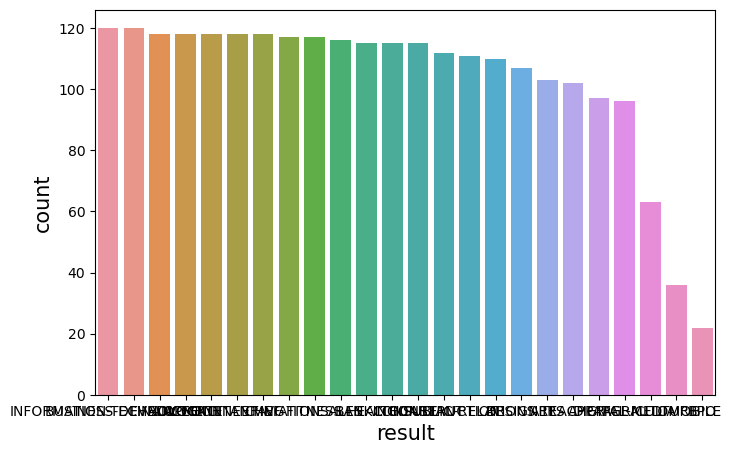

In [11]:
pot_lbl = df["Category"].value_counts()

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('result', fontsize=15)
plt.ylabel('count', fontsize=15)

In [12]:
X.columns = col_names
col_names
X

,marketing,summary,customer,service,manager,with,years,of,experience,in,...,using,food,strong,projects,accounts,2011,account,january,engineering,construction
0,0.000000,0.000000,0.078581,0.000000,0.024302,0.047314,0.000000,0.000000,0.0,0.067739,...,0.000000,0.000000,0.000000,0.026056,0.000000,0.024111,0.096515,0.000000,0.000000,0.023475
1,0.052679,0.047372,0.000000,0.000000,0.044808,0.021809,0.084684,0.045619,0.0,0.000000,...,0.034143,0.000000,0.000000,0.000000,0.000000,0.000000,0.076267,0.050419,0.000000,0.000000
2,0.000000,0.018253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.065779,0.049179,0.000000,0.000000,0.043489,0.000000,0.078366,0.025903,0.000000,0.083389
3,0.000000,0.083704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.042445,0.099714,0.078553,0.112301,0.000000,0.000000,0.038240
4,0.000000,0.000000,0.000000,0.000000,0.015249,0.014844,0.000000,0.031050,0.0,0.000000,...,0.011619,0.057914,0.000000,0.016350,0.038410,0.045389,0.103821,0.045756,0.016515,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.000000,0.026468,0.000000,0.053212,0.075108,0.000000,0.000000,0.050978,0.0,0.034893,...,0.000000,0.023771,0.000000,0.000000,0.126122,0.024839,0.170452,0.075121,0.000000,0.000000
2480,0.042919,0.000000,0.000000,0.038796,0.000000,0.000000,0.034497,0.000000,0.0,0.025440,...,0.027817,0.000000,0.000000,0.000000,0.022988,0.018110,0.113918,0.013693,0.000000,0.000000
2481,0.000000,0.000000,0.000000,0.000000,0.056071,0.054582,0.158953,0.000000,0.0,0.000000,...,0.042724,0.000000,0.000000,0.000000,0.000000,0.055630,0.063624,0.000000,0.000000,0.000000
2482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.022149,0.000000,0.000000,0.000000,0.000000,0.000000,0.181416,0.000000,0.000000,0.056158


Text(0.5, 1.0, 'Correlation Matrix')

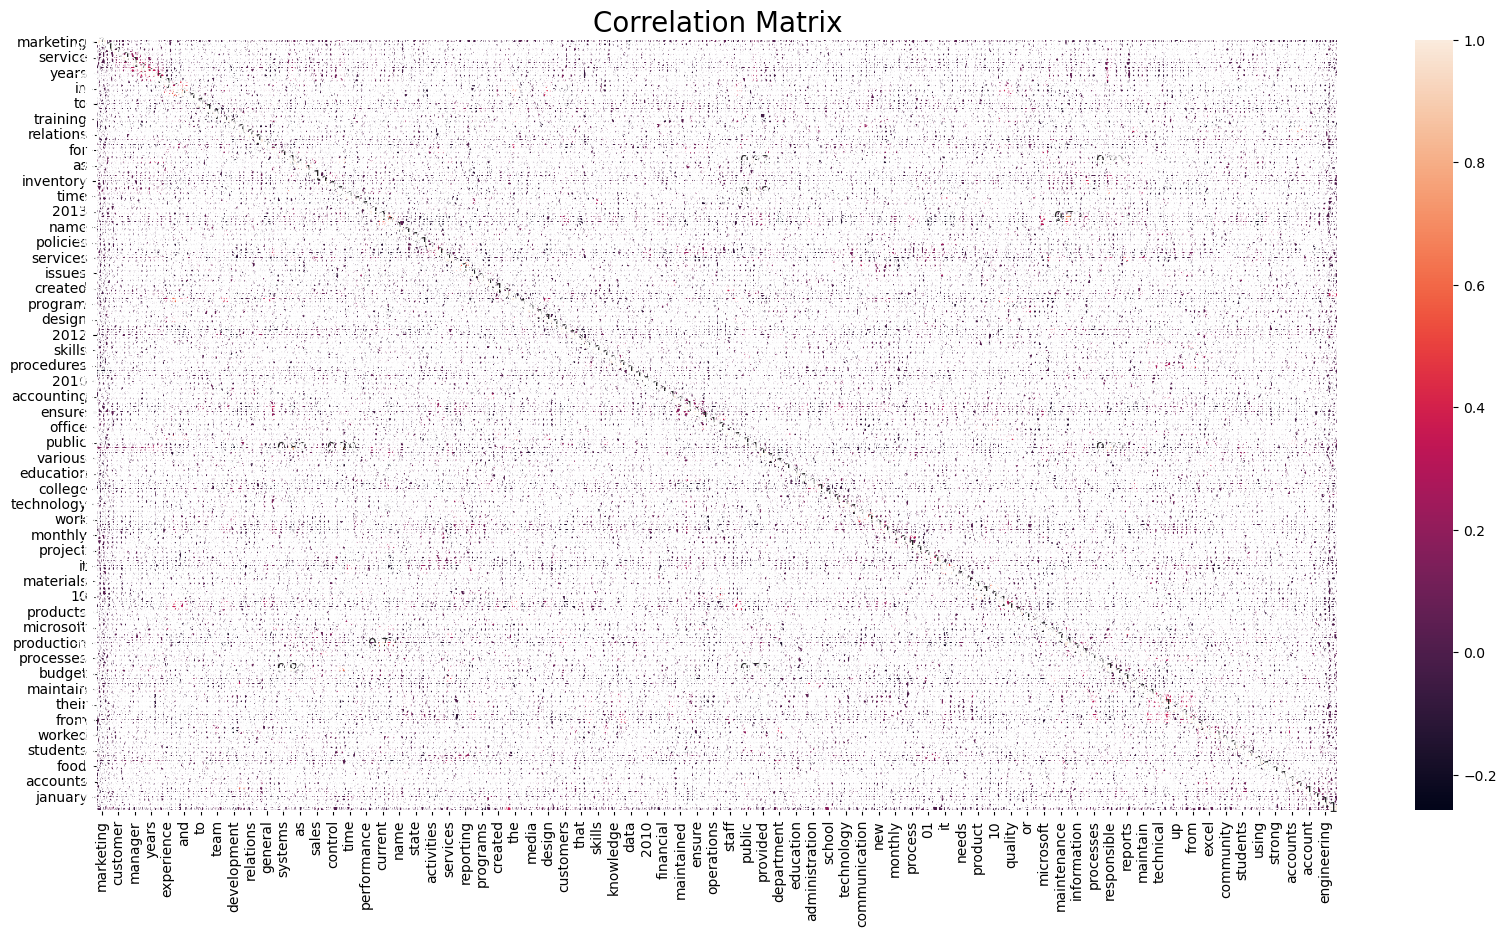

In [13]:
#correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print("Model:", model.__class__.__name__)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: LogisticRegression
Accuracy: 0.5131
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.64      0.79      0.71        29
              ADVOCATE       0.29      0.23      0.26        30
           AGRICULTURE       0.33      0.12      0.18         8
               APPAREL       0.20      0.10      0.13        20
                  ARTS       0.13      0.11      0.12        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.43      0.62      0.51        21
               BANKING       0.47      0.35      0.40        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.62      0.59      0.60        27
                  CHEF       0.80      0.67      0.73        24
          CONSTRUCTION       0.92      0.71      0.80        34
            CONSULTANT       0.23      0.15      0.18        20
              DESIGNER       0.71    

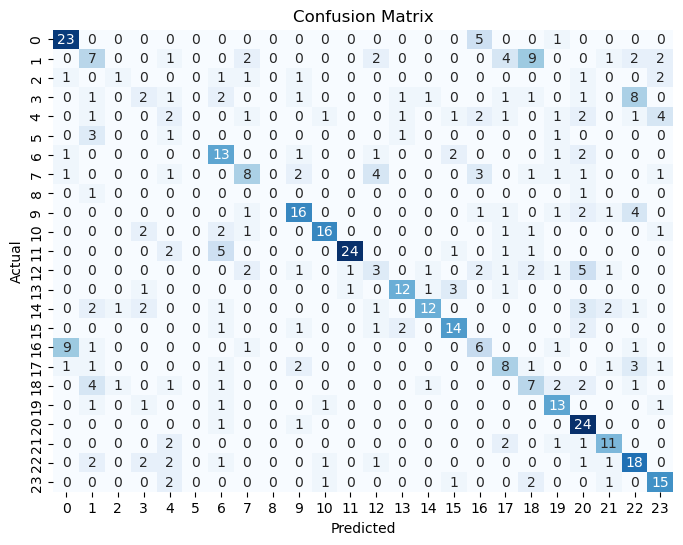

Model: SVC
Accuracy: 0.5151
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.63      0.76      0.69        29
              ADVOCATE       0.30      0.37      0.33        30
           AGRICULTURE       0.33      0.12      0.18         8
               APPAREL       0.20      0.15      0.17        20
                  ARTS       0.14      0.17      0.15        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.46      0.57      0.51        21
               BANKING       0.56      0.39      0.46        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.79      0.56      0.65        27
                  CHEF       0.80      0.67      0.73        24
          CONSTRUCTION       0.89      0.71      0.79        34
            CONSULTANT       0.15      0.20      0.17        20
              DESIGNER       0.73      0.58      0.6

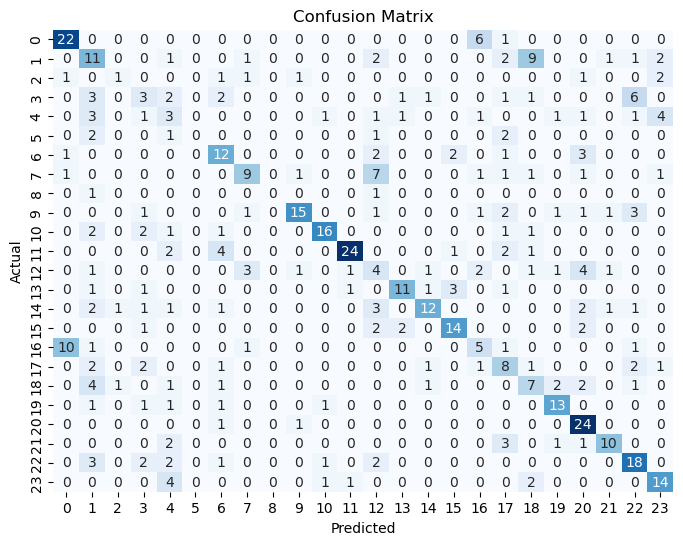

Model: GaussianNB
Accuracy: 0.4366
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.62      0.79      0.70        29
              ADVOCATE       0.23      0.23      0.23        30
           AGRICULTURE       0.17      0.12      0.14         8
               APPAREL       0.17      0.10      0.12        20
                  ARTS       0.18      0.11      0.14        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.50      0.52      0.51        21
               BANKING       0.40      0.17      0.24        23
                   BPO       0.13      1.00      0.24         2
  BUSINESS-DEVELOPMENT       0.54      0.48      0.51        27
                  CHEF       0.59      0.67      0.63        24
          CONSTRUCTION       0.82      0.68      0.74        34
            CONSULTANT       0.18      0.15      0.16        20
              DESIGNER       0.58      0.58  

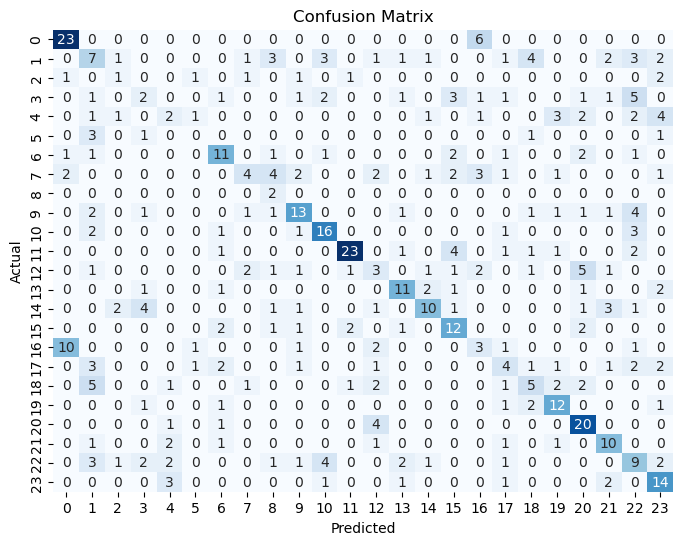

Model: KNeighborsClassifier
Accuracy: 0.4125
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.57      0.86      0.68        29
              ADVOCATE       0.21      0.40      0.28        30
           AGRICULTURE       0.03      0.12      0.05         8
               APPAREL       0.11      0.15      0.13        20
                  ARTS       0.17      0.33      0.22        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.30      0.33      0.32        21
               BANKING       0.25      0.13      0.17        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.59      0.48      0.53        27
                  CHEF       0.64      0.58      0.61        24
          CONSTRUCTION       0.92      0.65      0.76        34
            CONSULTANT       0.11      0.10      0.10        20
              DESIGNER       0.75  

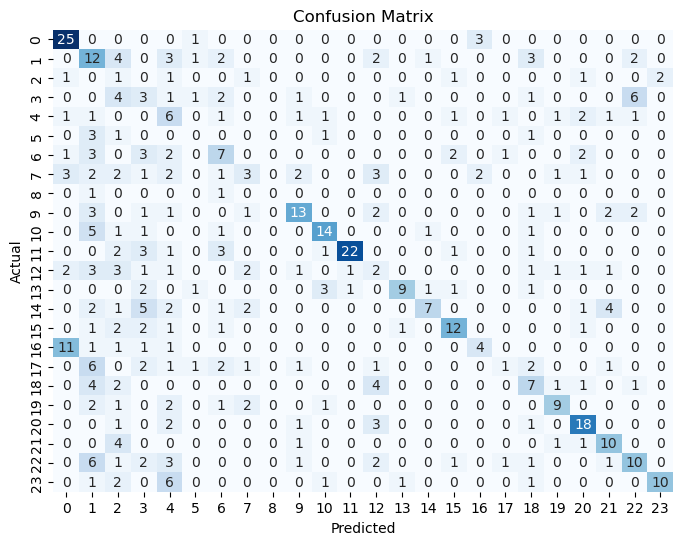

Model: RandomForestClassifier
Accuracy: 0.5151
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.62      0.79      0.70        29
              ADVOCATE       0.24      0.17      0.20        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.29      0.10      0.15        20
                  ARTS       0.17      0.11      0.13        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.52      0.67      0.58        21
               BANKING       0.50      0.35      0.41        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.68      0.56      0.61        27
                  CHEF       0.69      0.75      0.72        24
          CONSTRUCTION       0.88      0.85      0.87        34
            CONSULTANT       0.20      0.10      0.13        20
              DESIGNER       0.57

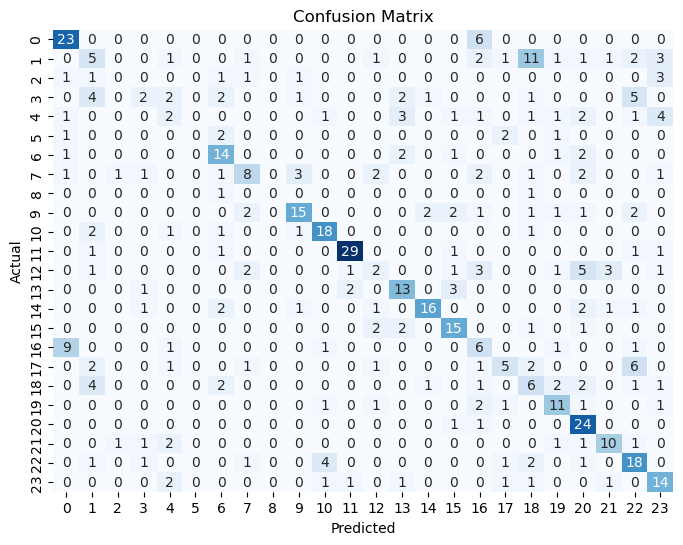

Model: DecisionTreeClassifier
Accuracy: 0.3380
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.67      0.55      0.60        29
              ADVOCATE       0.11      0.10      0.10        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.11      0.10      0.11        20
                  ARTS       0.21      0.22      0.22        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.36      0.38      0.37        21
               BANKING       0.23      0.22      0.22        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.27      0.22      0.24        27
                  CHEF       0.32      0.42      0.36        24
          CONSTRUCTION       0.94      0.47      0.63        34
            CONSULTANT       0.16      0.15      0.15        20
              DESIGNER       0.29

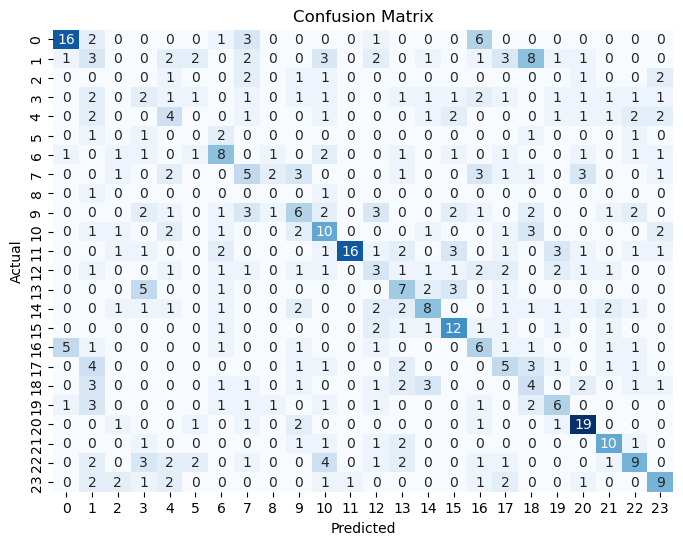

Model: HistGradientBoostingClassifier
Accuracy: 0.5392
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.72      0.71        29
              ADVOCATE       0.41      0.23      0.30        30
           AGRICULTURE       0.20      0.12      0.15         8
               APPAREL       0.28      0.25      0.26        20
                  ARTS       0.09      0.06      0.07        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.57      0.57      0.57        21
               BANKING       0.43      0.26      0.32        23
                   BPO       1.00      0.50      0.67         2
  BUSINESS-DEVELOPMENT       0.67      0.59      0.63        27
                  CHEF       0.74      0.71      0.72        24
          CONSTRUCTION       0.86      0.91      0.89        34
            CONSULTANT       0.50      0.25      0.33        20
              DESIGNER   

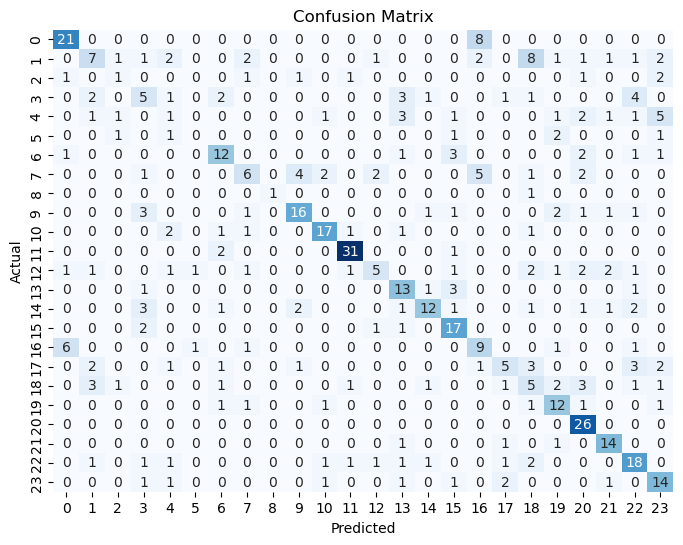

Model: ExtraTreesClassifier
Accuracy: 0.5372
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.62      0.83      0.71        29
              ADVOCATE       0.50      0.33      0.40        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.27      0.15      0.19        20
                  ARTS       0.38      0.17      0.23        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.57      0.57      0.57        21
               BANKING       0.60      0.26      0.36        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.73      0.59      0.65        27
                  CHEF       0.73      0.79      0.76        24
          CONSTRUCTION       0.88      0.85      0.87        34
            CONSULTANT       0.80      0.20      0.32        20
              DESIGNER       0.54  

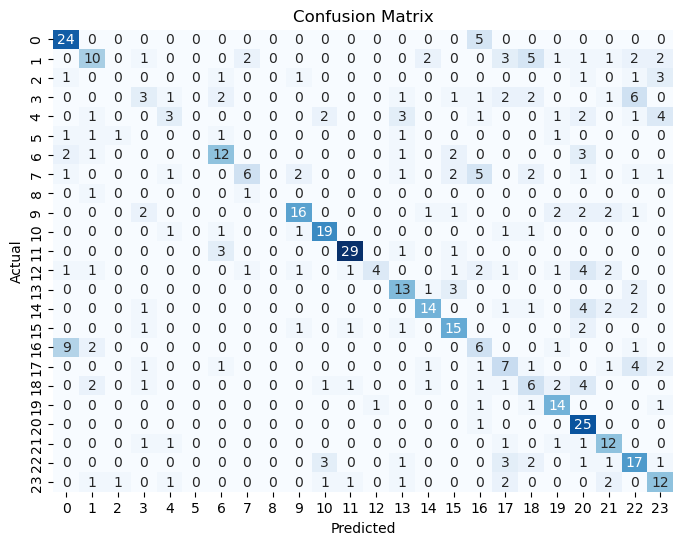

Model: MLPClassifier
Accuracy: 0.4970
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.79      0.74        29
              ADVOCATE       0.27      0.23      0.25        30
           AGRICULTURE       0.11      0.12      0.12         8
               APPAREL       0.25      0.25      0.25        20
                  ARTS       0.25      0.39      0.30        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.50      0.62      0.55        21
               BANKING       0.39      0.30      0.34        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.75      0.56      0.64        27
                  CHEF       0.75      0.62      0.68        24
          CONSTRUCTION       0.83      0.74      0.78        34
            CONSULTANT       0.25      0.25      0.25        20
              DESIGNER       0.57      0.6

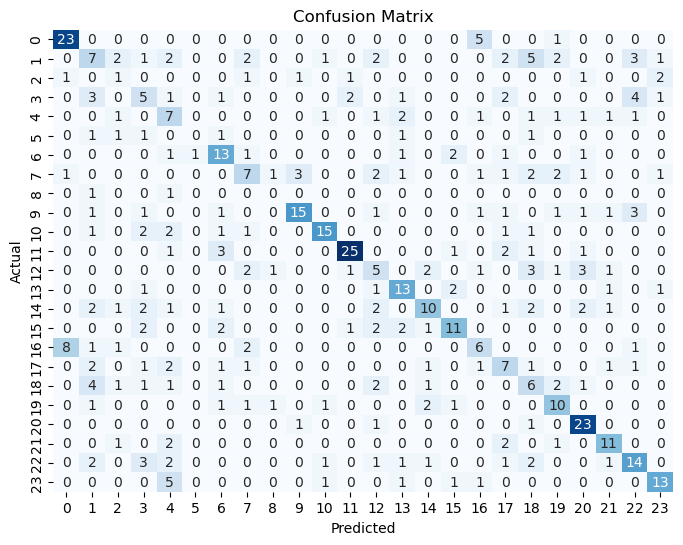

In [27]:
# Define a list of models to evaluate
models = [LogisticRegression(),SVC(),GaussianNB(),KNeighborsClassifier(),RandomForestClassifier(), DecisionTreeClassifier(),HistGradientBoostingClassifier(),ExtraTreesClassifier(),MLPClassifier()]

for model in models:
    train_and_evaluate_model(model,  X_train, y_train, X_test, y_test)

    

           ACCOUNTANT   ADVOCATE  AGRICULTURE    APPAREL  ARTS  AUTOMOBILE  \
precision    0.647059   0.187500          0.0   0.750000   0.0         0.0   
recall       0.916667   0.250000          0.0   0.300000   0.0         0.0   
f1-score     0.758621   0.214286          0.0   0.428571   0.0         0.0   
support     12.000000  12.000000          7.0  10.000000  10.0         3.0   

            AVIATION    BANKING  BPO  BUSINESS-DEVELOPMENT  ...    FITNESS  \
precision   0.357143   0.461538  0.0              0.476190  ...   0.200000   
recall      0.416667   0.500000  0.0              0.833333  ...   0.090909   
f1-score    0.384615   0.480000  0.0              0.606061  ...   0.125000   
support    12.000000  12.000000  2.0             12.000000  ...  11.000000   

           HEALTHCARE         HR  INFORMATION-TECHNOLOGY  PUBLIC-RELATIONS  \
precision    0.142857   0.750000                    0.50          0.588235   
recall       0.166667   0.818182                    0.75      

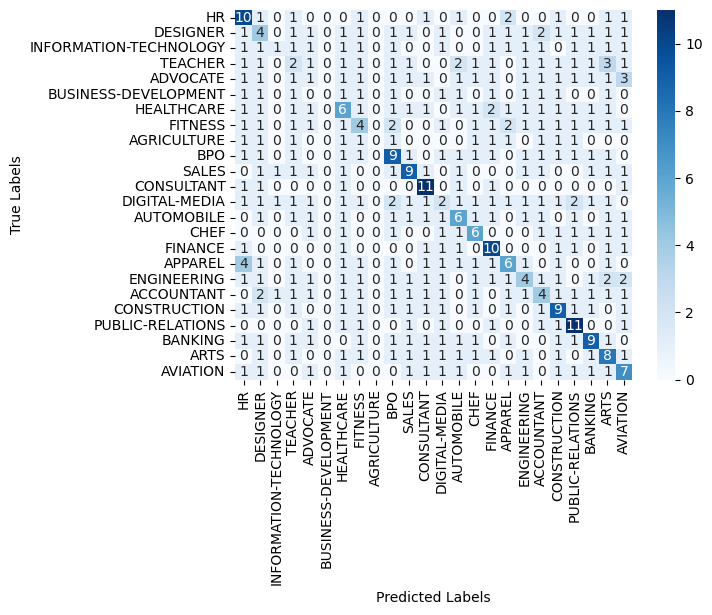

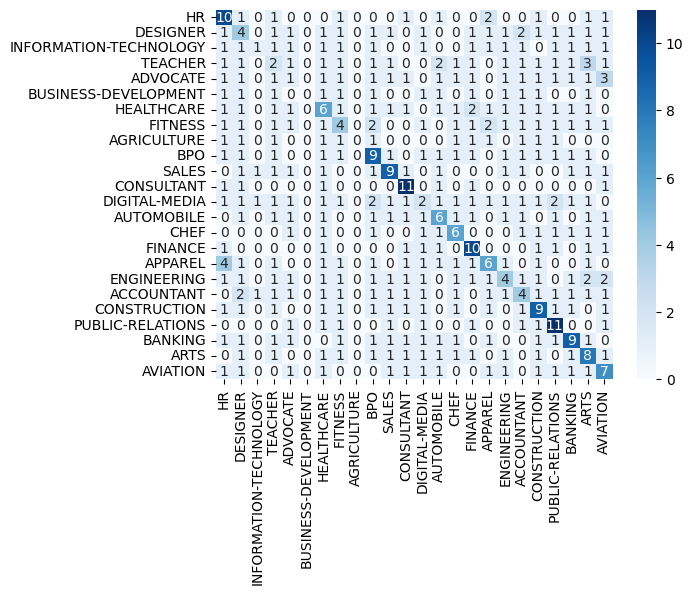

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss, cohen_kappa_score, jaccard_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix, classification_report
fold=10
# i=0

# 'Network attacks'
# 'Malware attacks'
# 'Exploit attacks'
# 'Reconnaissanc attacks'
# 'Testing Evaluation attacks'
# 'Normal'

model=RandomForestClassifier()


# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# Create an empty list to store the accuracy scores for each fold
accuracy_scores = []

# Create empty arrays to store the confusion matrices and classification reports for each fold
confusion_matrices = []



# Initialize an empty dictionary to store classification reports
reports = {}
# Initialize an empty DataFrame to store the mean classification report
mean_report = pd.DataFrame()



for train_index, test_index in skf.split(X, y):
    
    # Split the data into training and testing sets
    X_train, X_test =  X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =   y.iloc[train_index],  y.iloc[test_index]
    
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    
    
    
    report= classification_report(y_test,y_pred,output_dict=True)
    
  
    
    # Calculate the confusion matrix and classification report for the current fold
    cm = confusion_matrix(y_test, y_pred)
#     print(cm)
    
    accuracy_scores.append(acc)
    # Append the classification report to the dictionary
    reports[fold] = report
    # Append the confusion matrix and classification report to their respective arrays
    confusion_matrices.append(cm)
    
#     i=i+1


# Concatenate the classification reports into a single DataFrame
mean_report = pd.concat([pd.DataFrame.from_dict(reports[i]) for i in reports], axis=1)

# Compute the mean of the classification report DataFrame
mean_report = mean_report.mean(axis=1, level=0)

# Display the mean classification report
print(mean_report)

# Calculate the average confusion matrix and classification report across all folds
avg_cm = np.mean(confusion_matrices, axis=0)

# Calculate the average accuracy score across all folds
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy Score:", avg_accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
#np.set_printoptions(suppress=True)
avg_cm_ceil = np.ceil(avg_cm)
#sns.set(font_scale=1.4)

avg_cm_ceil = avg_cm_ceil.astype(int)

class_labels=['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']
# Generate heatmap of average confusion matrix
sns.heatmap(avg_cm_ceil, annot=True, cmap='Blues',fmt='d',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


rf_df = pd.DataFrame(mean_report).transpose()
rf_plot=sns.heatmap(avg_cm_ceil, annot=True, cmap='Blues',fmt='d',xticklabels=class_labels, yticklabels=class_labels)
   

In [21]:
# Concatenate the dataframes into a single dataframe
reports_df = pd.concat([rf_df])
# Save the plots to a file
rf_plot.figure.savefig('rf_cm.png')




# Save the dataframes to an Excel file
writer = pd.ExcelWriter('categorized_resumes.xlsx', engine='xlsxwriter')
reports_df.to_excel(writer, sheet_name='Reports')
workbook = writer.book

# Add the confusion matrix plots to the Excel file
worksheet = writer.sheets['Reports']
worksheet.insert_image('I2', 'rf_cm.png')

# Close the writer
writer.save()

In [20]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.0/153.0 kB 222.8 kB/s eta 0:00:00
